In [1]:
from compare_optimizer import compare_optimizer

#compare_optimizer()

['powell', 'BFGS', 'CG']


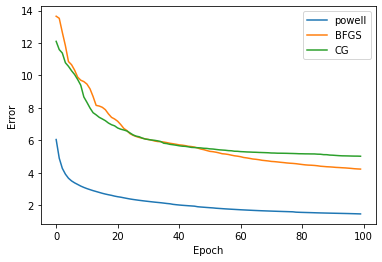

In [2]:
from compare_optimizer import graph_evolution, graph_latent_space, graph_comp_error_test, graph_latent_space_BFGS, graph_comp_error_train
from parser import parse_config
json_config = parse_config("resources/config.json")
input_values = list(map(lambda a: str(a), json_config["optimizers"]))
print(str(input_values))
graph_evolution(0,json_config["optimizers"], "optimizer")



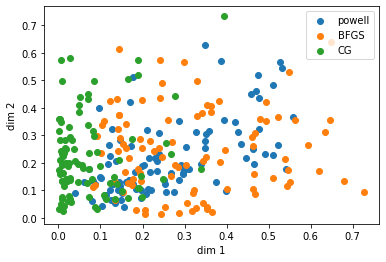

In [3]:
graph_latent_space(99,input_values, "optimizer")

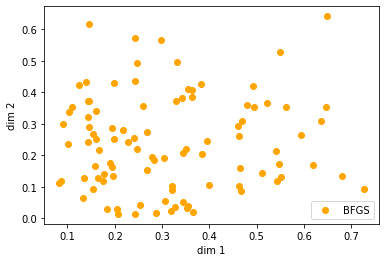

In [4]:
graph_latent_space_BFGS(99,input_values, "optimizer")

val:  powell
val:  BFGS
val:  CG
avg_errors size:  3  len input values:  3


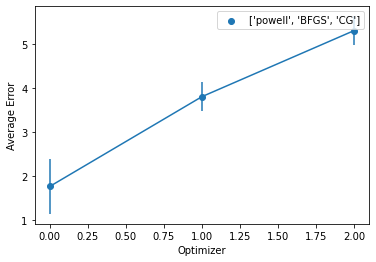

In [5]:
graph_comp_error_train(input_values,json_config["optimizers"], "optimizer")

val:  powell
val:  BFGS
val:  CG
avg_errors size:  3  len input values:  3


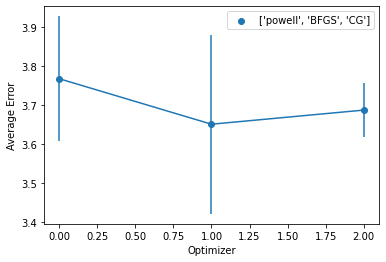

In [6]:
graph_comp_error_test(input_values,json_config["optimizers"], "optimizer")